# Восстановление золота из руды

В этом проекте нам нужно подготовить прототип модели машинного обучения для «Цифры». Компания разрабатывает решения для эффективной работы промышленных предприятий.

Модель должна предсказать коэффициент восстановления золота из золотосодержащей руды. Мы будем использоваться данными с параметрами добычи и очистки. 

Модель поможет оптимизировать производство, чтобы не запускать предприятие с убыточными характеристиками.

Подзадачи:

1. Подготовить данные;
2. Провести исследовательский анализ данных;
3. Построить и обучить модель.


## Подготовка данных

### Импорт данных

In [1]:
# ! pip install catboost

In [2]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_absolute_error, accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import make_scorer
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from catboost import CatBoostRegressor
from sklearn.dummy import DummyRegressor
from sklearn.linear_model import MultiTaskLassoCV
from sklearn.linear_model import RidgeCV

In [3]:
try:
    df_full = pd.read_csv('/datasets/gold_recovery_full.csv')
    df_test = pd.read_csv('/datasets/gold_recovery_test.csv')
    df_train = pd.read_csv('/datasets/gold_recovery_train.csv')
    
except:
    df_full = pd.read_csv('gold_recovery_full_new.csv')
    df_train = pd.read_csv('gold_recovery_train_new.csv')
    df_test = pd.read_csv('gold_recovery_test_new.csv')

### Обзор данных

#### Полный датасет `df_full`

In [4]:
df_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19439 entries, 0 to 19438
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                19439 non-null  object 
 1   final.output.concentrate_ag                         19438 non-null  float64
 2   final.output.concentrate_pb                         19438 non-null  float64
 3   final.output.concentrate_sol                        19228 non-null  float64
 4   final.output.concentrate_au                         19439 non-null  float64
 5   final.output.recovery                               19439 non-null  float64
 6   final.output.tail_ag                                19438 non-null  float64
 7   final.output.tail_pb                                19338 non-null  float64
 8   final.output.tail_sol                               19433 non-null  float64


In [5]:
df_full.head()

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2,2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
3,2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
4,2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691


In [6]:
df_full.isna().mean().sort_values(ascending=False).head(15)

secondary_cleaner.output.tail_sol           0.089922
rougher.input.floatbank11_xanthate          0.023304
rougher.state.floatbank10_e_air             0.022429
primary_cleaner.output.concentrate_sol      0.019034
secondary_cleaner.state.floatbank2_a_air    0.011317
final.output.concentrate_sol                0.010854
rougher.input.feed_size                     0.007459
primary_cleaner.output.concentrate_pb       0.005967
primary_cleaner.input.xanthate              0.005350
final.output.tail_pb                        0.005196
rougher.input.feed_pb                       0.005144
rougher.input.feed_sol                      0.005093
primary_cleaner.output.tail_sol             0.003189
rougher.input.floatbank11_sulfate           0.002263
primary_cleaner.input.depressant            0.001903
dtype: float64

**В полной базе данных 87 признаков и 19439 наблюдений.**

Больше всего пропусков у признака `secondary_cleaner.output.tail_sol` - почти 9%. У всех остальных признаков пропущено менее 3% значений. 

Так как это полная база данных, которая нам будет нужна для проверки модели, мы не будем вносить в нее никаких изменений.

#### Обучающий датасет `df_train`

In [7]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14149 entries, 0 to 14148
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                14149 non-null  object 
 1   final.output.concentrate_ag                         14148 non-null  float64
 2   final.output.concentrate_pb                         14148 non-null  float64
 3   final.output.concentrate_sol                        13938 non-null  float64
 4   final.output.concentrate_au                         14149 non-null  float64
 5   final.output.recovery                               14149 non-null  float64
 6   final.output.tail_ag                                14149 non-null  float64
 7   final.output.tail_pb                                14049 non-null  float64
 8   final.output.tail_sol                               14144 non-null  float64


In [8]:
df_train.head()

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2,2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
3,2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
4,2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691


In [9]:
df_train.isna().mean().sort_values(ascending=False).head(15)

secondary_cleaner.output.tail_sol           0.113436
rougher.state.floatbank10_e_air             0.030815
rougher.input.floatbank11_xanthate          0.030249
primary_cleaner.output.concentrate_sol      0.020213
secondary_cleaner.state.floatbank2_a_air    0.015337
final.output.concentrate_sol                0.014913
rougher.input.feed_size                     0.010177
primary_cleaner.input.xanthate              0.007068
rougher.input.feed_pb                       0.007068
final.output.tail_pb                        0.007068
primary_cleaner.output.concentrate_pb       0.006078
rougher.input.feed_sol                      0.005513
primary_cleaner.output.tail_sol             0.003251
rougher.input.floatbank11_sulfate           0.002544
primary_cleaner.input.depressant            0.002262
dtype: float64

In [10]:
na_to_fill = list(df_train.isna().mean().sort_values(ascending=False).head(7).index)

**Мы видим, что в обучающей базе, как и в полной, 87 признаков. Наблюдений меньше: 14149.** 

Больше всего пропусков - более 11% - у признака `secondary_cleaner.output.tail_sol`. В признаках `rougher.state.floatbank10_e_air` и `rougher.input.floatbank11_xanthate` около 3% пропущенных значений. 
В `primary_cleaner.output.concentrate_sol`, `secondary_cleaner.state.floatbank2_a_air`, `final.output.concentrate_sol` и `rougher.input.feed_size` от 1 до 2% пропусков. 

С этими признаками мы поработаем: удаление пропусков здесь принесет к значительным потерям данных, поэтому на дальнейших этапах заполним пропуски через **ffill**, так как нам известно, что данные индексируются датой и временем получения информации и соседние по времени параметры похожи. 

Пропуски в остальных признаках мы удалим. 

#### Тестовый датасет `df_test`

In [11]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5290 entries, 0 to 5289
Data columns (total 53 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   date                                        5290 non-null   object 
 1   primary_cleaner.input.sulfate               5286 non-null   float64
 2   primary_cleaner.input.depressant            5285 non-null   float64
 3   primary_cleaner.input.feed_size             5290 non-null   float64
 4   primary_cleaner.input.xanthate              5286 non-null   float64
 5   primary_cleaner.state.floatbank8_a_air      5290 non-null   float64
 6   primary_cleaner.state.floatbank8_a_level    5290 non-null   float64
 7   primary_cleaner.state.floatbank8_b_air      5290 non-null   float64
 8   primary_cleaner.state.floatbank8_b_level    5290 non-null   float64
 9   primary_cleaner.state.floatbank8_c_air      5290 non-null   float64
 10  primary_clea

In [12]:
df_test.head()

,date,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-09-01 00:59:59,210.800909,14.993118,8.080000,1.005021,1398.981301,-500.225577,1399.144926,-499.919735,1400.102998,...,12.023554,-497.795834,8.016656,-501.289139,7.946562,-432.317850,4.872511,-500.037437,26.705889,-499.709414
1,2016-09-01 01:59:59,215.392455,14.987471,8.080000,0.990469,1398.777912,-500.057435,1398.055362,-499.778182,1396.151033,...,12.058140,-498.695773,8.130979,-499.634209,7.958270,-525.839648,4.878850,-500.162375,25.019940,-499.819438
2,2016-09-01 02:59:59,215.259946,12.884934,7.786667,0.996043,1398.493666,-500.868360,1398.860436,-499.764529,1398.075709,...,11.962366,-498.767484,8.096893,-500.827423,8.071056,-500.801673,4.905125,-499.828510,24.994862,-500.622559
3,2016-09-01 03:59:59,215.336236,12.006805,7.640000,0.863514,1399.618111,-498.863574,1397.440120,-499.211024,1400.129303,...,12.033091,-498.350935,8.074946,-499.474407,7.897085,-500.868509,4.931400,-499.963623,24.948919,-498.709987
4,2016-09-01 04:59:59,199.099327,10.682530,7.530000,0.805575,1401.268123,-500.808305,1398.128818,-499.504543,1402.172226,...,12.025367,-500.786497,8.054678,-500.397500,8.107890,-509.526725,4.957674,-500.360026,25.003331,-500.856333


In [13]:
df_test.isna().mean().sort_values(ascending=False).head(15)

rougher.input.floatbank11_xanthate            0.004726
rougher.input.feed_sol                        0.003970
secondary_cleaner.state.floatbank3_a_air      0.001701
rougher.input.floatbank11_sulfate             0.001512
primary_cleaner.input.depressant              0.000945
rougher.input.floatbank10_sulfate             0.000945
primary_cleaner.input.xanthate                0.000756
primary_cleaner.input.sulfate                 0.000756
rougher.input.feed_rate                       0.000567
secondary_cleaner.state.floatbank2_a_air      0.000567
secondary_cleaner.state.floatbank2_b_air      0.000378
rougher.input.feed_size                       0.000189
secondary_cleaner.state.floatbank2_b_level    0.000000
rougher.state.floatbank10_f_level             0.000000
rougher.state.floatbank10_f_air               0.000000
dtype: float64

In [14]:
df_test.isna().sum().sum()

90

**В тестовой выборке 52 признака и 5290 наблюдений.**

В данных минимальное количество пропусков: всего 90 на весь датасет! Потерять эти данные совсем не страшно - эти строки можно будет удалить.  

### Проверка эффективности обогащения

Прежде чем приступать к предобработке данных, проверим, что эффективность обогащения рассчитана правильно. 

Проведем вычисления по формуле **Recovery** на обучающей выборке для признака `rougher.output.recovery`. Найдем **MAE** между нашими расчётами и значением признака. 

$$
Recovery =  \frac{C*(F-T)}{F*(C-T)}\  * 100%
$$

где:

* C — доля золота в концентрате после флотации/очистки;
* F — доля золота в сырье/концентрате до флотации/очистки;
* T — доля золота в отвальных хвостах после флотации/очистки.


In [15]:
def recovery(c, f, t):
    numerator = c * (f - t)
    denominator = f * (c - t)
    recovery = numerator / denominator * 100
    
    return recovery

In [16]:
rec = recovery(df_train['rougher.output.concentrate_au'], 
               df_train['rougher.input.feed_au'], 
               df_train['rougher.output.tail_au'])

In [17]:
mae = mean_absolute_error(df_train[['rougher.output.recovery']], rec)
mae

9.73512347450521e-15

Средняя абсолютная ошибка очень мала, а значит **мы можем считать, что формула Recovery для рассчета эффективности обогащения корректна.**

### Признаки, недоступные в тестовой выборке

Изучим, какие из признаков, содержащихся в полной и обучающей выборках, не попали в тестовую. 

In [18]:
missing_columns = set(df_full.columns) - set(df_test.columns) 
missing_columns

{'final.output.concentrate_ag',
 'final.output.concentrate_au',
 'final.output.concentrate_pb',
 'final.output.concentrate_sol',
 'final.output.recovery',
 'final.output.tail_ag',
 'final.output.tail_au',
 'final.output.tail_pb',
 'final.output.tail_sol',
 'primary_cleaner.output.concentrate_ag',
 'primary_cleaner.output.concentrate_au',
 'primary_cleaner.output.concentrate_pb',
 'primary_cleaner.output.concentrate_sol',
 'primary_cleaner.output.tail_ag',
 'primary_cleaner.output.tail_au',
 'primary_cleaner.output.tail_pb',
 'primary_cleaner.output.tail_sol',
 'rougher.calculation.au_pb_ratio',
 'rougher.calculation.floatbank10_sulfate_to_au_feed',
 'rougher.calculation.floatbank11_sulfate_to_au_feed',
 'rougher.calculation.sulfate_to_au_concentrate',
 'rougher.output.concentrate_ag',
 'rougher.output.concentrate_au',
 'rougher.output.concentrate_pb',
 'rougher.output.concentrate_sol',
 'rougher.output.recovery',
 'rougher.output.tail_ag',
 'rougher.output.tail_au',
 'rougher.output.ta

Логично: в тестовом датасете отсутствуют признаки категории **"output"**, то есть те, которые отвечают за параметры продукта, получаемого на том или ином этапе нашего процесса. Помимо этого, в тестовой выборке не включены признаки рассчета флотации **"rougher.calculation"**. 

Обозначим списком признаки и целевые признаки для дальнейшего удобства.

In [19]:
X_columns = df_test.columns[1:]
y_columns = ['rougher.output.recovery', 'final.output.recovery']

А теперь добавим в **`df_test`** целевые признаки. 

In [20]:
df_test.shape

(5290, 53)

In [21]:
df_full_y_columns = df_full[['date', 'rougher.output.recovery', 'final.output.recovery']]
df_test = df_test.merge(df_full_y_columns, on='date', how='left')

In [22]:
df_test.shape

(5290, 55)

### Предобработка данных

Сразу обозначим переменные с названиями признаков и целевых признаков. 

In [23]:
features_columns = df_test.columns
target_columns = ['rougher.output.recovery', 'final.output.recovery']

Удалим дубликаты, если они имеются. 

In [24]:
df_full.duplicated().sum(), df_train.duplicated().sum(), df_test.duplicated().sum()

(0, 0, 0)

Заполним пропуски в 7 признаках с наибольшим количеством пропусков таблицы **`df_train`** при помощи метода **ffill**: суть этого метода в том, что пропуски заполняются предыдущим ненулевым значением признака. Это подходит в условиях нашей задачи, так как данные в датафреймах индексируются по дате и времени получения информации и соседние значения похожи. 

7 признаков, с которыми мы будем работать, мы предварительно положили в список **na_to_fill**.

In [25]:
df_train[na_to_fill] = df_train[na_to_fill].fillna(method='ffill')
df_train[na_to_fill].isna().sum()

secondary_cleaner.output.tail_sol           0
rougher.state.floatbank10_e_air             0
rougher.input.floatbank11_xanthate          0
primary_cleaner.output.concentrate_sol      0
secondary_cleaner.state.floatbank2_a_air    0
final.output.concentrate_sol                0
rougher.input.feed_size                     0
dtype: int64

Далее мы можем удалить оставшиеся пропуски в **`df_train`** и **`df_test`**.

In [26]:
df_train.shape, df_test.shape

((14149, 87), (5290, 55))

In [27]:
df_train.isna().sum().sum(), df_test.isna().sum().sum()

(773, 90)

In [28]:
df_train = df_train.dropna().reset_index(drop=True)
df_test = df_test.dropna().reset_index(drop=True)

In [29]:
df_train.shape, df_test.shape

((13636, 87), (5229, 55))

### Промежуточные выводы

Мы рассмотрели 3 базы данных: **`df_full`**, **`df_train`** и **`df_test`**.

На этапе обзора данных мы обнаружили пропуски во всех трех базах данных. Посколько полная база данных **`df_full`** нам необходима скорее для изучения данных и общей картины, с этой базой мы решили никах изменений не предпринимать. Что же касается **`df_train`** и **`df_test`**, в обучающей базе было обнаружено много пропусков, большую часть которых мы заполнили по методу _ffill_, а остальные удалили на этапе предобработки. В тестовой выборке пропущенных значений было крайне мало, их мы попросту удалили во время предобработки. 

Для того, чтобы быть уверенными, что эффективность обогащения рассчитана правильно, мы рассчитали ее по формуле **Recovery** на обучающей выборке для признака `rougher.output.recovery` и нашли MAE между нашими расчётами и значением признака: значение MAE оказалось очень близко к нулю, а значит формула корректна. 

Было также обнаружено, что в **`df_full`** и **`df_train`** 87 признаков, а в **`df_test`** только 53. Мы изучили, какие признаки отсутствуют в **`df_test`**. Это признаки категории **"output"**, и признаки рассчета флотации **"rougher.calculation"**. 

Мы добавили в **`df_test`** два целевых признака: `rougher.output.recovery` и `final.output.recovery`.

## Анализ данных

На этом этапе мы рассмотрим, как меняется концентрация металлов по этапам очистки и как распределяются размеры гранул сырья в обучающей и тестовой выборках. Также изучим, как меняется суммарная концентрация всех веществ на различных этапах очистки. 

### Изменение концентрации металлов (Au, Ag, Pb) на различных этапах очистки

Мы пронаблюдаем, как меняется концентрация золота, серебра и свинца на следующих этапах:
* исходное сырье
* флотация
* первый этап очистки
* второй этап очистки

Для этого мы посмотрим на распределения металлов на каждом этапе отдельно, а затем посмотрим отдельно на металлы в ключе этих этапов. 

#### С точки зрения этапов

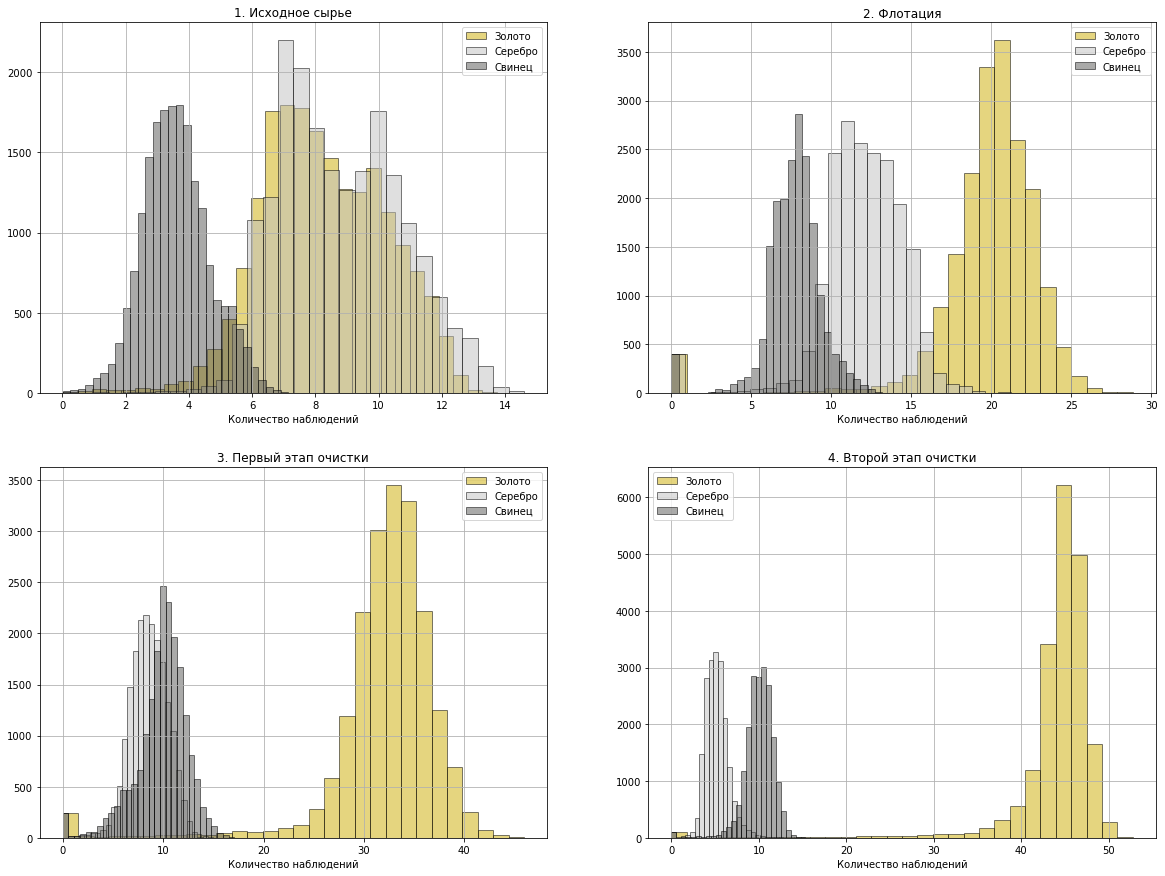

In [30]:
fig=plt.figure()

ax_1=fig.add_subplot(2, 2, 1)
plt.hist(df_full['rougher.input.feed_au'], bins=30, alpha=0.5, edgecolor='black', color='#ccac00')
plt.hist(df_full['rougher.input.feed_ag'], bins=30, alpha=0.5, edgecolor='black', color='#c0c0c0')
plt.hist(df_full['rougher.input.feed_pb'], bins=30, alpha=0.5, edgecolor='black', color='#565655')
plt.grid()
plt.xlabel('Количество наблюдений')
plt.legend(['Золото', 'Серебро', 'Свинец'])
plt.title('1. Исходное сырье')

ax_2=fig.add_subplot(2, 2, 2)
plt.hist(df_full['rougher.output.concentrate_au'], bins=30, alpha=0.5, edgecolor='black', color='#ccac00')
plt.hist(df_full['rougher.output.concentrate_ag'], bins=30, alpha=0.5, edgecolor='black', color='#c0c0c0')
plt.hist(df_full['rougher.output.concentrate_pb'], bins=30, alpha=0.5, edgecolor='black', color='#565655')
plt.grid()
plt.xlabel('Количество наблюдений')
plt.legend(['Золото', 'Серебро', 'Свинец'])
plt.title('2. Флотация')

ax_3=fig.add_subplot(2, 2, 3)
plt.hist(df_full['primary_cleaner.output.concentrate_au'], bins=30, alpha=0.5, edgecolor='black', color='#ccac00')
plt.hist(df_full['primary_cleaner.output.concentrate_ag'], bins=30, alpha=0.5, edgecolor='black', color='#c0c0c0')
plt.hist(df_full['primary_cleaner.output.concentrate_pb'], bins=30, alpha=0.5, edgecolor='black', color='#565655')
plt.grid()
plt.xlabel('Количество наблюдений')
plt.legend(['Золото', 'Серебро', 'Свинец'])
plt.title('3. Первый этап очистки')

ax_4=fig.add_subplot(2, 2, 4)
plt.hist(df_full['final.output.concentrate_au'], bins=30, alpha=0.5, edgecolor='black', color='#ccac00')
plt.hist(df_full['final.output.concentrate_ag'], bins=30, alpha=0.5, edgecolor='black', color='#c0c0c0')
plt.hist(df_full['final.output.concentrate_pb'], bins=30, alpha=0.5, edgecolor='black', color='#565655')
plt.grid()
plt.xlabel('Количество наблюдений')
plt.legend(['Золото', 'Серебро', 'Свинец'])
plt.title('4. Второй этап очистки')

plt.gcf().set_size_inches(20, 15)
plt.show()

Можно заметить, что в исходном сырье преобладают серебро и золото, причем первого немного больше, чем второго. В ходе этапов очистки, золото уверенно сдвигается вправо, а доля дргуих металлов снижается - что логично, на это процесс и рассчитан. 

#### С точки зрения металлов

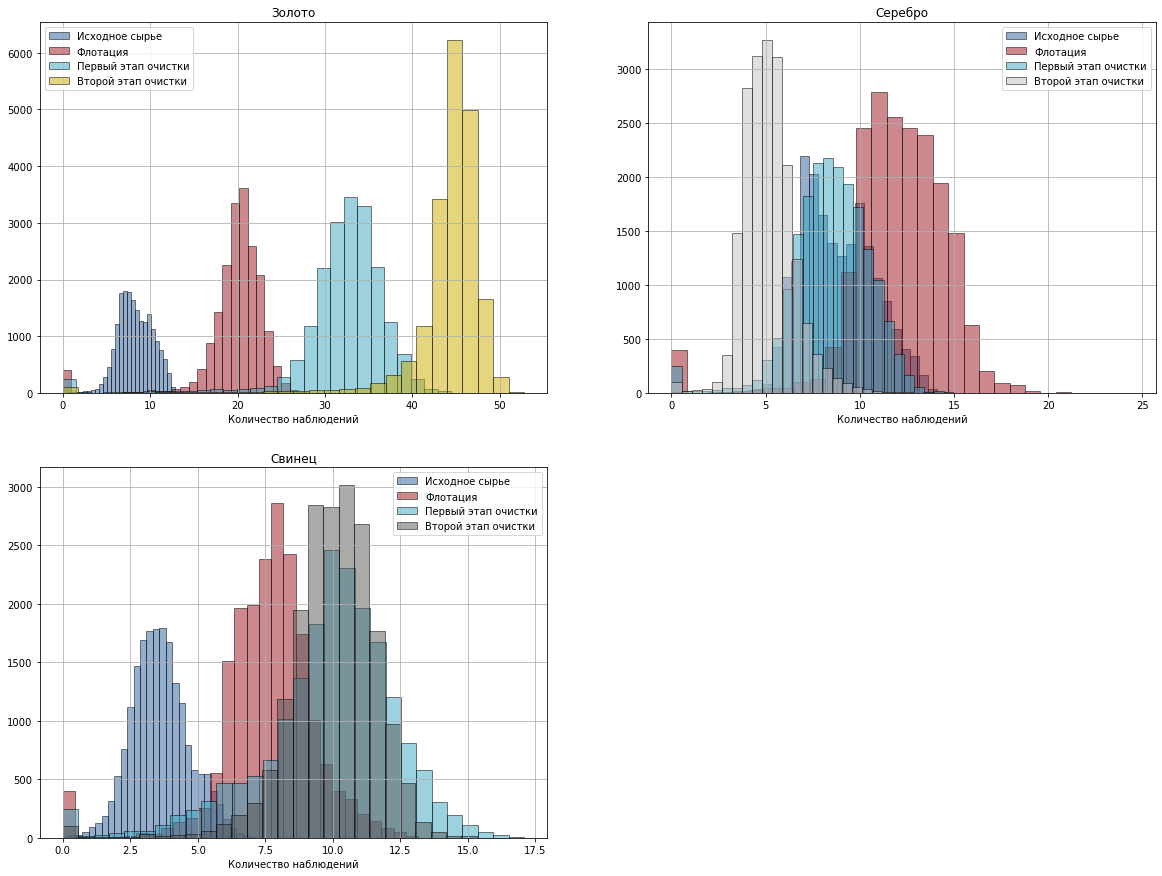

In [31]:
fig=plt.figure()

ax_1=fig.add_subplot(2, 2, 1)
plt.hist(df_full['rougher.input.feed_au'], bins=30, alpha=0.5, edgecolor='black', color='#29609C')
plt.hist(df_full['rougher.output.concentrate_au'], bins=30, alpha=0.5, edgecolor='black', color='#9C131E')
plt.hist(df_full['primary_cleaner.output.concentrate_au'], bins=30, alpha=0.5, edgecolor='black', color='#3AA5C3')
plt.hist(df_full['final.output.concentrate_au'], bins=30, alpha=0.5, edgecolor='black', color='#ccac00')
plt.grid()
plt.xlabel('Количество наблюдений')
plt.legend(['Исходное сырье', 'Флотация', 'Первый этап очистки', 'Второй этап очистки'])
plt.title('Золото')

ax_2=fig.add_subplot(2, 2, 2)
plt.hist(df_full['rougher.input.feed_ag'], bins=30, alpha=0.5, edgecolor='black', color='#29609C')
plt.hist(df_full['rougher.output.concentrate_ag'], bins=30, alpha=0.5, edgecolor='black', color='#9C131E')
plt.hist(df_full['primary_cleaner.output.concentrate_ag'], bins=30, alpha=0.5, edgecolor='black', color='#3AA5C3')
plt.hist(df_full['final.output.concentrate_ag'], bins=30, alpha=0.5, edgecolor='black', color='#c0c0c0')
plt.grid()
plt.xlabel('Количество наблюдений')
plt.legend(['Исходное сырье', 'Флотация', 'Первый этап очистки', 'Второй этап очистки'])
plt.title('Серебро')

ax_3=fig.add_subplot(2, 2, 3)
plt.hist(df_full['rougher.input.feed_pb'], bins=30, alpha=0.5, edgecolor='black', color='#29609C')
plt.hist(df_full['rougher.output.concentrate_pb'], bins=30, alpha=0.5, edgecolor='black', color='#9C131E')
plt.hist(df_full['primary_cleaner.output.concentrate_pb'], bins=30, alpha=0.5, edgecolor='black', color='#3AA5C3')
plt.hist(df_full['final.output.concentrate_pb'], bins=30, alpha=0.5, edgecolor='black', color='#565655')
plt.grid()
plt.xlabel('Количество наблюдений')
plt.legend(['Исходное сырье', 'Флотация', 'Первый этап очистки', 'Второй этап очистки'])
plt.title('Свинец')

plt.gcf().set_size_inches(20, 15)
plt.show()

С золотом все понятно: исходного сырье поэтапно очищается от всего, кроме него. 

Что же касается серебра и свинца, можно наблюдать, что на этапе флотации и первичной очистки из концентрация почему-то выше по сравнению с исходными данными. При этом на втором этапе очистки серебро ведет себя хорошо, а именно сильно уменьшается относительно других этапов. 

А вот свинец, наоборот растет в своей концентрации на этапах флотации и первого этапа очистки и лишь немного снижается на втором этапе. То есть свинец растет относительно свинца, но, возвращаясь к предыдущим гистограммам, мы знаем, что относительно золота концентрация свинца падает значительно по ходу очистки. 

### Распределение размеров гранул сырья на обучающей и тестовой выборках

Сравним размеры гранул (признаки `.input.feed_size`) для обучающей и тестовой выборок. Это нужно для того, чтобы определить, насколько различаются распределения: если различия значительные, то оценка модели может быть некорректной. 

Посмотрим на эти признаки на двух этапах:
* `rougher.input.feed_size`
* `primary_cleaner.input.feed_size`

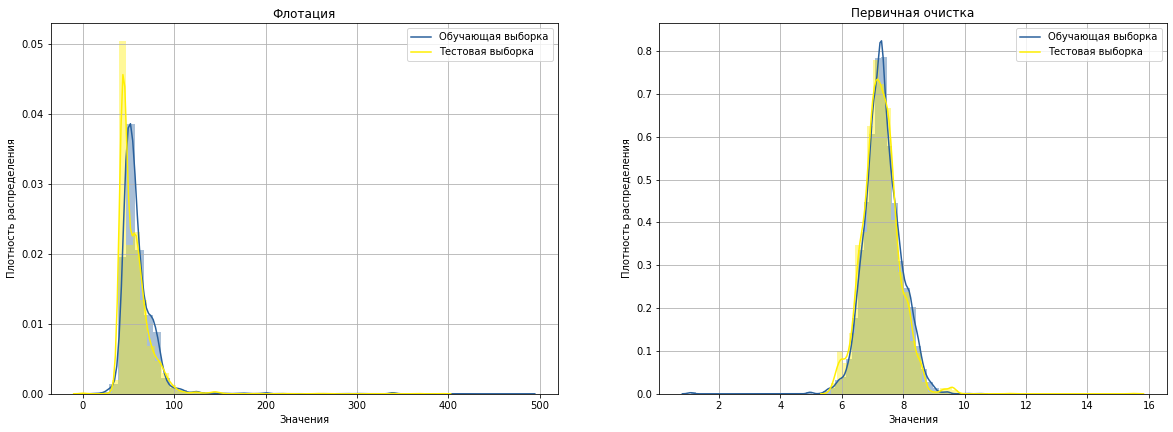

In [32]:
fig=plt.figure()

ax_1=fig.add_subplot(2, 2, 1)
sns.distplot(df_train['rougher.input.feed_size'], color='#29609C')
sns.distplot(df_test['rougher.input.feed_size'], color='#ffef00')
plt.grid()
plt.xlabel('Значения')
plt.ylabel('Плотность распределения')
plt.legend(['Обучающая выборка', 'Тестовая выборка'])
plt.title('Флотация')

ax_2=fig.add_subplot(2, 2, 2)
sns.distplot(df_train['primary_cleaner.input.feed_size'], color='#29609C')
sns.distplot(df_test['primary_cleaner.input.feed_size'], color='#ffef00')
plt.grid()
plt.xlabel('Значения')
plt.ylabel('Плотность распределения')
plt.legend(['Обучающая выборка', 'Тестовая выборка'])
plt.title('Первичная очистка')

plt.gcf().set_size_inches(20, 15)
plt.show()

Размер зерна распределяется подобным образом на обучающей и тестовой выборках как на этапе флотации, так и на этапе первичной обработки.

### Суммарная концентрация всех веществ на разных этапах очистки

Посчитаем суммарную концентрацию всех веществ на следующих этапах:
* исходное сырье
* флотация
* первый этап очистки
* второй этап очистки

Помимо золота, серебра и свинца, в базе имеются данные по веществу с названием _sol_. Нам неизвестно, что это вещество из себя представляет, однако его необходимо включить в анализ. 

In [33]:
def total_substance_dist(data):
    
    data['rougher.input.feed_total'] = (data['rougher.input.feed_ag'] +
                                        data['rougher.input.feed_pb'] +
                                        data['rougher.input.feed_sol'] +
                                        data['rougher.input.feed_au'])

    data['rougher.output.concentrate_total'] = (data['rougher.output.concentrate_ag'] +
                                                data['rougher.output.concentrate_pb'] +
                                                data['rougher.output.concentrate_sol'] +
                                                data['rougher.output.concentrate_au'])

    data['primary_cleaner.output.concentrate_total'] = (data['primary_cleaner.output.concentrate_ag'] +
                                                data['primary_cleaner.output.concentrate_pb'] +
                                                data['primary_cleaner.output.concentrate_sol'] +
                                                data['primary_cleaner.output.concentrate_au'])

    data['final.output.concentrate_total'] = (data['final.output.concentrate_ag'] +
                                              data['final.output.concentrate_pb'] +
                                              data['final.output.concentrate_sol'] +
                                              data['final.output.concentrate_au'])

    sns.distplot(data['rougher.input.feed_total'], color='#e16963')
    sns.distplot(data['rougher.output.concentrate_total'], color='#e163bb')
    sns.distplot(data['primary_cleaner.output.concentrate_total'], color='#fae351')
    sns.distplot(data['final.output.concentrate_total'], color='#41b0ed')
    plt.grid()
    plt.xlabel('Значения')
    plt.ylabel('Плотность распределения')
    plt.legend(['Исходное сырье', 'Флотация', 'Первый этап очистки', 'Второй этап очистки'])
    plt.gcf().set_size_inches(15, 7)
    plt.show()

Полная выборка:

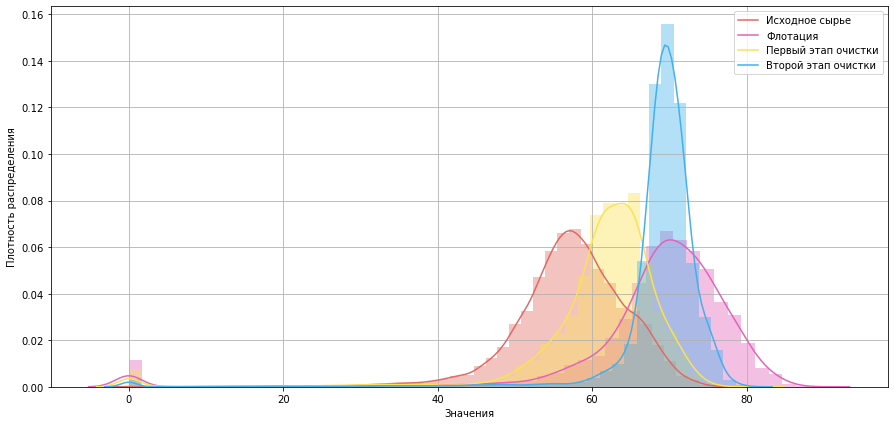

In [34]:
total_substance_dist(df_full)

В полной выборке можно заметить некоторое количество значений, близких к нулю - это выбросы. Проверим, аналогична ли ситуация для обучающей выборки. Помним, что в тестовой параметры типа `.output` у нас отсутствуют. 

Обучающая выборка:

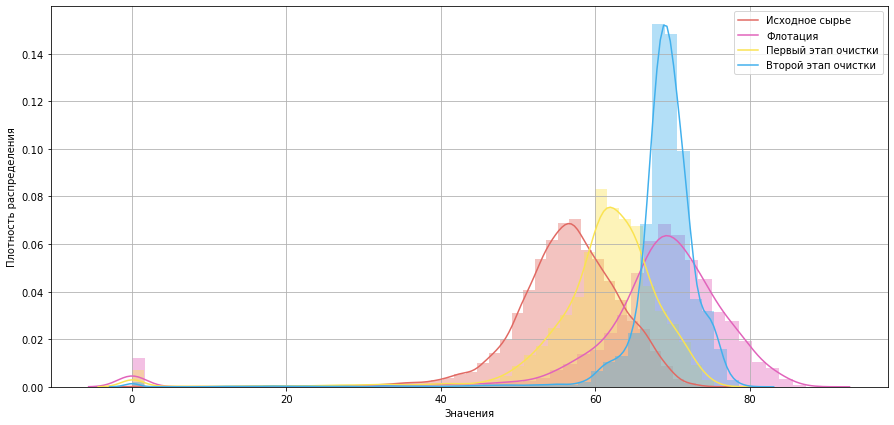

In [35]:
total_substance_dist(df_train)

В обучающей выборке выбросы тоже имеются. Отсюда их стоит удалить, чтобы это не повлияло на модель. 

In [36]:
df_train.shape

(13636, 91)

In [37]:
df_train = df_train.drop(df_train[df_train['rougher.input.feed_total'] < 1].index)
df_train = df_train.drop(df_train[df_train['rougher.output.concentrate_total'] < 1].index)
df_train = df_train.drop(df_train[df_train['primary_cleaner.output.concentrate_total'] < 1].index)
df_train = df_train.drop(df_train[df_train['final.output.concentrate_total'] < 1].index)

In [38]:
df_train.shape

(13167, 91)

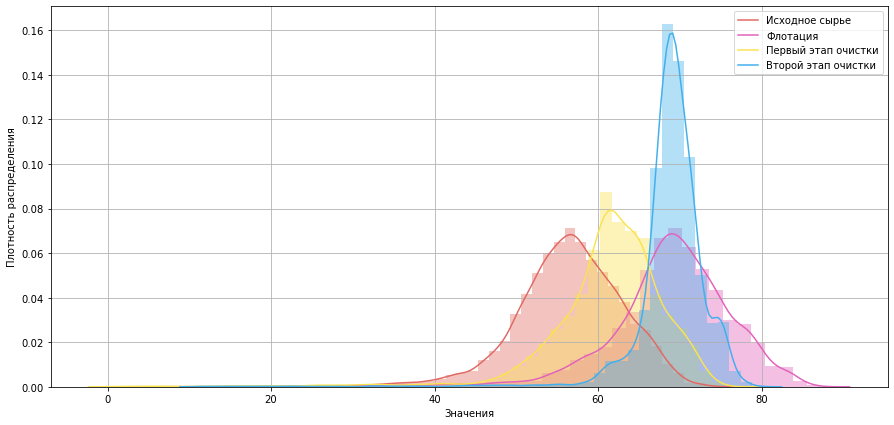

In [39]:
total_substance_dist(df_train)

От выбросов избавились! 

Можно заметить, что на втором этапе очистки суммарная концентрация веществ повышается и сжимается к медиане. Возможно, это связано с тем, что на втором этапе очистки мы избавляемся от большого количества веществ, повышая концентрацию золота. И распределение суммарной концентрации выглядит похоже на распределение золота: вероятно от того, что значительную долю в этой сумме именно оно и занимает. 

### Промежуточные выводы

* по ходу очистки растет концентрация золота и снижается концентрация практически всех остальных металлов
* при этом стоит отметить, что концентрация свинца несколько повышается относительно исходной
* распределения размеров гранул сырья на обучающей и тестовой выборках похожи, значит, не стоит беспокоиться, что оценка модели будет некорректной (по этой причине)
* суммарная концентрация всех веществ на различных этапах очиски изменяется и на втором этапе по своему распределению походит на распределение золота
* были обнаружены выбросы - околонулевые значения; эти выбросы мы удалили из обучающей выборки для улучшения точности модели

## Модель

На этом этапе мы посмотрим модель, которая сможет предсказывать наши целевые признаки:
* `rougher.output.recovery`
* `final.output.recovery`

Качество работы модели мы будем оценивать по **sMAPE**, _Symmetric Mean Absolute Percentage Error_.

Сначала напишем функцию для рассчета **sMAPE**.

### Функция sMAPE

In [40]:
def sMAPE(y_true, predict):
    rougher, final = ((abs(y_true - predict) / ((abs(y_true) + abs(predict)) / 2)).mean() * 100)    
    result = (0.25 * rougher + 0.75 * final)
    return result

И сделаем эту функцию метрикой качества модели. 

In [41]:
smape = make_scorer(sMAPE, greater_is_better=False)

Также объявим функции для определения **sMAPE** для одного целевого признака и для подсчета финального **sMAPE**. Это необходимо сделать для того, чтобы посчитать качество модели **CatBoost**, которая ругается на два целевых признака. 

In [42]:
def smape_ind(y_true, predict):
    result = ((abs(y_true - predict) / ((abs(y_true) + abs(predict)) / 2)).mean() * 100)
    return result

In [43]:
def smape_total(rougher, final):
    result = smape_1 * 0.25 + smape_2 * 0.75
    return result

### Признаки X и целевые признаки y

Обозначим признаки и целевые признаки для обучающей и тестовой выборок. В признаки могут войти только те признаки из **`df_train`**, которые есть и в **`df_test`**.

In [44]:
X_train = df_train[X_columns]
y_train = df_train[y_columns]

X_test = df_test[X_columns]
y_test = df_test[y_columns]

In [45]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((13167, 52), (13167, 2), (5229, 52), (5229, 2))

Масштабируем признаки для того, чтобы облегчить процесс обучения модели и помочь ей лучше предсказывать целевые признаки.

In [46]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

### Поиск лучшей модели 

#### Линейная регрессия

In [47]:
model_lr = LinearRegression()
parameters_lr = {'normalize': [True, False],
                'fit_intercept': [True, False]}

grid_lr = GridSearchCV(model_lr, parameters_lr, cv=5, scoring=smape)
grid_lr.fit(X_train_scaled, y_train)
grid_lr.best_params_

{'fit_intercept': True, 'normalize': True}

In [48]:
model_lr_final = LinearRegression(fit_intercept=True, normalize=True)
model_lr_final.fit(X_train_scaled, y_train)
predicted_lr = model_lr_final.predict(X_test_scaled)
smape_lr = sMAPE(y_test, predicted_lr)
smape_lr

8.83843814254485

Лучшая модель линейной регрессии имеет параметры **fit_intercept=True** и **normalize=True**.

**sMAPE этой модели: 8.84**

#### Регрессия LASSO

In [49]:
%%time

model_lasso = MultiTaskLassoCV(cv=5)
model_lasso.fit(X_train_scaled, y_train)
predicted_lasso = model_lasso.predict(X_test_scaled)
smape_lasso = sMAPE(y_test, predicted_lasso)
smape_lasso

CPU times: user 47.5 s, sys: 333 ms, total: 47.8 s
Wall time: 26.6 s


8.095286465666721

In [50]:
model_lasso.get_params()

{'alphas': None,
 'copy_X': True,
 'cv': 5,
 'eps': 0.001,
 'fit_intercept': True,
 'max_iter': 1000,
 'n_alphas': 100,
 'n_jobs': None,
 'normalize': 'deprecated',
 'random_state': None,
 'selection': 'cyclic',
 'tol': 0.0001,
 'verbose': False}

Лучшая модель регрессии LASSO для нескольких целевых признаков имеет параметры **fit_intercept=True**, **normalize='deprecated'** и **selection='cyclic'**.

**sMAPE этой модели: 8.1**

#### Регрессия Ridge

In [51]:
%%time

model_ridge = RidgeCV()
model_ridge.fit(X_train_scaled, y_train)
predicted_ridge = model_ridge.predict(X_test_scaled)
smape_ridge = sMAPE(y_test, predicted_ridge)
smape_ridge

CPU times: user 91.8 ms, sys: 17.9 ms, total: 110 ms
Wall time: 79.4 ms


8.828445496764902

In [52]:
model_ridge.get_params()

{'alpha_per_target': False,
 'alphas': array([ 0.1,  1. , 10. ]),
 'cv': None,
 'fit_intercept': True,
 'gcv_mode': None,
 'normalize': 'deprecated',
 'scoring': None,
 'store_cv_values': False}

Лучшая модель регрессии Ridge имеет параметры **fit_intercept=True** и **normalize='deprecated'**.

**sMAPE этой модели: 8.83**

#### Дерево решений

In [53]:
%%time

model_dt = DecisionTreeRegressor()
parameters_dt = {'max_depth': range (1, 20)}

grid_dt = GridSearchCV(model_dt, parameters_dt, cv=5, scoring=smape)
grid_dt.fit(X_train, y_train)
grid_dt.best_params_

CPU times: user 50.2 s, sys: 309 ms, total: 50.5 s
Wall time: 51.7 s


{'max_depth': 2}

In [54]:
model_dt_final = DecisionTreeRegressor(max_depth=2)
model_dt_final.fit(X_train, y_train)
predicted_dt = model_dt_final.predict(X_test)
smape_dt = sMAPE(y_test, predicted_dt)
smape_dt

9.210521287679168

Лучшая модель дерева решений имеет параметр **max_depth=2**.

**sMAPE этой модели: 9.21**.

#### Случайный лес

In [55]:
%%time

model_rf = RandomForestRegressor()
parameters_rf = {'n_estimators': range (10, 40, 10),
                 'max_depth': range (1, 14, 2)}

grid_rf = GridSearchCV(model_rf, parameters_rf, cv=5, scoring=smape)
grid_rf.fit(X_train, y_train)
grid_rf.best_params_

CPU times: user 8min 27s, sys: 2.25 s, total: 8min 30s
Wall time: 8min 40s


{'max_depth': 3, 'n_estimators': 30}

In [56]:
model_rf_final = RandomForestRegressor(n_estimators=30, max_depth=5)
model_rf_final.fit(X_train, y_train)
predicted_rf = model_rf_final.predict(X_test)
smape_rf = sMAPE(y_test, predicted_rf)
smape_rf

8.740200227097471

Лучшая модель случайного леса имеет параметры **max_depth=5** и **n_estimators=30**.

**sMAPE этой модели: 8.83**.

#### CatBoost

In [57]:
y_train_rougher = y_train['rougher.output.recovery']
y_train_final = y_train['final.output.recovery']
y_test_rougher = y_test['rougher.output.recovery']
y_test_final = y_test['final.output.recovery']

model_cb = CatBoostRegressor()
parameters_cb = {'n_estimators': range(1, 10),
                'grow_policy': ['SymmetricTree', 'Depthwise', 'Lossguide'],
                'depth': range(1,10)}

In [73]:
%%time

grid_cb = GridSearchCV(model_cb, parameters_cb, cv=5, scoring=make_scorer(smape_ind, greater_is_better=False))
grid_cb.fit(X_train, y_train_rougher, verbose=0)
grid_cb.best_params_

Custom logger is already specified. Specify more than one logger at same time is not thread safe.

CPU times: user 8min, sys: 10.7 s, total: 8min 10s
Wall time: 2min 42s


{'depth': 4, 'grow_policy': 'SymmetricTree', 'n_estimators': 6}

In [74]:
model_cb_rougher = CatBoostRegressor(depth=4, grow_policy='SymmetricTree', n_estimators=6)
model_cb_rougher.fit(X_train, y_train_rougher)
predicted_cb_rougher = model_cb_rougher.predict(X_test)
smape_ind(y_test_rougher, predicted_cb_rougher)

Learning rate set to 0.5
0:	learn: 6.3292852	total: 9.87ms	remaining: 49.4ms
1:	learn: 5.5863422	total: 20.7ms	remaining: 41.4ms
2:	learn: 5.2795698	total: 30.9ms	remaining: 30.9ms
3:	learn: 5.0486332	total: 40.9ms	remaining: 20.5ms
4:	learn: 4.9055675	total: 50.5ms	remaining: 10.1ms
5:	learn: 4.7585276	total: 60.4ms	remaining: 0us


7.720920561071083

In [75]:
%%time

grid_cb = GridSearchCV(model_cb, parameters_cb, cv=5, scoring=make_scorer(smape_ind, greater_is_better=False))
grid_cb.fit(X_train, y_train_final, verbose=0)
grid_cb.best_params_

CPU times: user 7min 47s, sys: 10.6 s, total: 7min 57s
Wall time: 2min 39s


{'depth': 2, 'grow_policy': 'Lossguide', 'n_estimators': 5}

In [76]:
model_cb_final = CatBoostRegressor(depth=2, grow_policy='Lossguide', n_estimators=5)
model_cb_final.fit(X_train, y_train_final)
predicted_cb_final = model_cb_final.predict(X_test)
smape_ind(y_test_final, predicted_cb_final)

Learning rate set to 0.5
0:	learn: 7.9045048	total: 4.15ms	remaining: 16.6ms
1:	learn: 7.5778449	total: 12.2ms	remaining: 18.3ms
2:	learn: 7.3310308	total: 16.7ms	remaining: 11.2ms
3:	learn: 7.1005030	total: 20.4ms	remaining: 5.11ms
4:	learn: 6.9552047	total: 23.6ms	remaining: 0us


8.71856006920132

Посчитаем общее **sMAPE** для параметров, подобранных:
* моделью **CatBoost** для предсказывания эффективности обогащения черногово концентрата (на этапе флотации)
* моделью **CatBoost** для предсказывания обогащения финального концентрата (на выходе из второго этапа очистки)

Мы помним, что итоговое **sMAPE** на 75% состоит из метрики для финального концентрата и только на 25% из чернового. 

In [77]:
# best CatBoost model parameters for rougher 

model_cb_rougher.fit(X_train, y_train_final)
predicted_cb_rougher_final = model_cb_rougher.predict(X_test)

smape_1 = smape_ind(y_test_rougher, predicted_cb_rougher)
smape_2 = smape_ind(y_test_final, predicted_cb_rougher_final)

smape_total_rougher = smape_total(smape_1, smape_2)

print(smape_total_rougher)

Learning rate set to 0.5
0:	learn: 7.6925630	total: 5.82ms	remaining: 29.1ms
1:	learn: 7.2794306	total: 12.1ms	remaining: 24.2ms
2:	learn: 7.0242422	total: 18.8ms	remaining: 18.8ms
3:	learn: 6.8573680	total: 24.6ms	remaining: 12.3ms
4:	learn: 6.7578574	total: 30.1ms	remaining: 6.01ms
5:	learn: 6.6766348	total: 35.4ms	remaining: 0us
8.44944122152061


In [78]:
# best CatBoost model parameters for final 

model_cb_final.fit(X_train, y_train_rougher)
predicted_cb_final_rougher = model_cb_final.predict(X_test)

smape_1 = smape_ind(y_test_rougher, predicted_cb_final_rougher)
smape_2 = smape_ind(y_test_final, predicted_cb_final)

smape_total_rougher = smape_total(smape_1, smape_2)
smape_cb = smape_total_rougher

print(smape_total_rougher)

Learning rate set to 0.5
0:	learn: 6.6769055	total: 7.24ms	remaining: 29ms
1:	learn: 6.0397156	total: 12.5ms	remaining: 18.8ms
2:	learn: 5.6669306	total: 16.3ms	remaining: 10.9ms
3:	learn: 5.4593308	total: 20.3ms	remaining: 5.06ms
4:	learn: 5.3175872	total: 23.6ms	remaining: 0us
8.494396103845174


Лучшая модель CatBoost имеет параметры **depth=4**, **grow_policy='SymmetricTree'** и **n_estimators=6**.

**sMAPE этой модели: 8.49**.

#### Сравнение моделей

Объединим все результаты в таблице. 

In [79]:
model_smape_dict = {
    'smape': [smape_lr, smape_lasso, smape_ridge, smape_dt, smape_rf, smape_cb]
}
model_smape_columns=['linear_regression', 
                    'lasso_regression', 
                    'ridge_regression', 
                    'descision_tree', 
                    'random_forest',
                    'catboost']
model_smape = pd.DataFrame(model_smape_dict).transpose().round(2)
model_smape.columns = model_smape_columns

model_smape

,linear_regression,lasso_regression,ridge_regression,descision_tree,random_forest,catboost
smape,8.84,8.1,8.83,9.21,8.74,8.49


Наилучшее значение метрики **sMAPE** показывает модель LASSO (8.1), а наихудшие - дерево решений (9.21). 

Проверим модель на адекватность при помощи DummyRegressor. 

### Оценка адекватности модели

In [80]:
for strategy in ['mean', 'median']:
    dummy = DummyRegressor(strategy=strategy)
    dummy.fit(X_train, y_train)
    dummy_predictions = dummy.predict(X_test)
    dummy_results = sMAPE(y_test, dummy_predictions)
    
    print('Стратегия:', strategy)
    print('Accuracy:', dummy_results)
    print()

Стратегия: mean
Accuracy: 9.26746764615411

Стратегия: median
Accuracy: 8.972605277586712



Самый умный Dummy показывает **sMAPE** в 8.97: это немного больше, чем у большинства моделей. Тем не менее, с уверенностью утверждать, что наша модель прошла проверку на адекватность, мы не можем: при значении метрики **sMAPE** от 0 до 100% разница между лучшей моделью (8.1) и лучшим результатом Dummy (8.97) не так значительна. 

Мы можем сказать, что наша лучшая модель предсказывает несколько лучше, чем примитивная, но не настолько хорошо, чтобы называть ее адекватной. 

### Промежуточные выводы

Мы объявили функцию **sMAPE**, выделили признаки и целевые признаки, а также обучили шесть моделей:
* линейная регрессия
* регрессия LASSO
* регрессия Ridge
* дерево решений
* случайный лес
* CatBoost

Лучшие показатели **sMAPE**, а именно **8.1**, показала модель **регрессии LASSO** при параметрах **fit_intercept=True**, **normalize='deprecated'** и **selection='cyclic'**.

При проверке модели на адекватность при помощи **DummyRegressor** было получено значение **sMAPE**, равное 8.97. Это значение было получено при оценки модели, которая всегда предсказывает медианное значение. Несомненно, это показатель чуть выше показателя лучшей модели, но все же адекватной нашу модель назвать, к сожалению, не приходится. 

## Общие выводы

**Задача состояла в том, чтобы подготовить прототип модели машинного обучения для предсказаний коэффициента восстановления золота из золотосодержащей руды.**

**Модель должна максимально точно предсказываться два целевых признака:** `rougher.output.recovery` и `final.output.recovery`.

**_На этапе подготовки данных_** мы изучили три базы данных - **`df_full`**, **`df_train`** и **`df_test`**. Было обнаружено, что в тестовой базе данных отсутствуют признаки категории **"output"**, и признаки рассчета флотации **"rougher.calculation"**. 

Мы поработали с пропусками в **`df_train`** и **`df_test`**. **Заполнили большую часть пропусков в обучающей выборке про помощи метода _ffill_**, так как данные в датафреймах индексируются по дате и времени получения информации и соседние значения похожи. Остальные пропуски мы позволили себе удалить - их было совсем не много. 

Мы также **удостоверились, что эффективность обогащения рассчитана правильно**: рассчитали ее по формуле **Recovery** на обучающей выборке для признака `rougher.output.recovery` и нашли MAE между нашими расчётами и значением признака. Значение MAE оказалось очень близко к нулю, а значит формула корректна. 

Далее мы провели **_анализ данных_**: рассмотрели, как меняется концентрация металлов по этапам очистки и как распределяются размеры гранул сырья в обучающей и тестовой выборках. Также изучили, как меняется суммарная концентрация всех веществ на различных этапах очистки. 

Выяснили, что **по ходу растет концентрация золота и снижается концентрация практически всех остальных металлов**. Однако, свинец ведет себя немного странно: его концентрация несколько растет на этапах флотации и первичной очистки, а на втором этапе очистки она значительно выше исходной. Возможно, дело в технологичестких нюансах и нюансах поведения металлов. Тем не менее, на втором этапе очистки золота, как и должно быть, значительно больше всего остального  

Затем мы удостоверились, что **распределения размеров гранул сырья на обучающей и тестовой выборках похожи, значит, не стоит беспокоиться, что оценка модели будет некорректной (по этой причине).**

При рассмотрении **суммарной концентрации металлов по этапам очистки**, мы заметили, что эта концентрация всех веществ изменяется и **на втором этапе сжимается к медиане и по своему распределению походит на распределение золота** - это объясняется тем, что на втором этапе очистки эта самая суммарная концентрация в большой мере из золота и состоит. 
Также при изучении суммарной концентрации **были обнаружены выбросы** - околонулевые значения; эти выбросы мы **удалили из обучающей выборки** для улучшения точности модели.

Затем пришло время для машинного обучения! Сначала мы ввели скоринг - функцию для рассчета **sMAPE**. Затем выделили признаки и целевые признаки, а также **обучили шесть моделей:**
* линейная регрессия
* регрессия LASSO
* регрессия Ridge
* дерево решений
* случайный лес
* CatBoost

Лучшие показатели **sMAPE**, **8.1**, показала модель **регрессии LASSO** при параметрах **fit_intercept=True**, **normalize='deprecated'** и **selection='cyclic'**.

При проверке модели на адекватность при помощи **DummyRegressor** возникли сомнения: лучшее значение **sMAPE** у Dummy получилось 8.97, что несильно больше, чем результат нашей лучшей модели (8.1). Можно сделать вывод, что **наша модель предсказывает несколько лучше примитивной, но не настолько лучше, чтобы считать ее адекватной.** 